## Сначала загрузим данные

In [97]:
import pandas as pd

train_data = pd.read_csv('./advanced-dls-spring-2021/train.csv')

train_data.sample(n = 2)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
424,48,19.95,1004.5,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),0
1286,38,84.10,3187.65,Female,0,No,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),0


In [98]:
assert(train_data.isna().sum().sum() == 0)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Нужно проверить, что все числовые признаки имеют числовой тип

In [99]:

# Списки признаков для удобства

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

from pandas.api.types import is_object_dtype
from pandas.api.types import is_numeric_dtype

changed_types = []

for col in num_cols:
    if is_object_dtype(train_data[col]):
        train_data[col] = pd.to_numeric(train_data[col], errors='coerce')
        changed_types.append(col)
        print(col + " type changed to numeric")
        
        
for col in cat_cols:
    if is_numeric_dtype(train_data[col]):
        changed_types.append(col)
        print(col + " type changed to category")
    train_data[col] = train_data[col].astype('category')

train_data['Churn'] = train_data['Churn'].astype('category')

train_data.info()

TotalSpent type changed to numeric
IsSeniorCitizen type changed to category
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ClientPeriod              5282 non-null   int64   
 1   MonthlySpending           5282 non-null   float64 
 2   TotalSpent                5273 non-null   float64 
 3   Sex                       5282 non-null   category
 4   IsSeniorCitizen           5282 non-null   category
 5   HasPartner                5282 non-null   category
 6   HasChild                  5282 non-null   category
 7   HasPhoneService           5282 non-null   category
 8   HasMultiplePhoneNumbers   5282 non-null   category
 9   HasInternetService        5282 non-null   category
 10  HasOnlineSecurityService  5282 non-null   category
 11  HasOnlineBackup           5282 non-null   category
 12  HasDeviceProtection       52

Пропуски есть лишь у атрибута TotalSpent

### Найдем номера строк с пропусками

In [100]:
selected_rows = train_data[train_data[changed_types[0]].isnull()]
print(selected_rows.index)

print(pd.read_csv('./advanced-dls-spring-2021/train.csv').iloc[selected_rows.index]['TotalSpent'].value_counts())

Index([1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598], dtype='int64')
TotalSpent
    9
Name: count, dtype: int64


### Мы видим, что эта колонка содержала пустые строки, которые не получилось скастить к числу. Заменим их на 0

In [101]:
train_data['TotalSpent'] = train_data['TotalSpent'].fillna(0)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ClientPeriod              5282 non-null   int64   
 1   MonthlySpending           5282 non-null   float64 
 2   TotalSpent                5282 non-null   float64 
 3   Sex                       5282 non-null   category
 4   IsSeniorCitizen           5282 non-null   category
 5   HasPartner                5282 non-null   category
 6   HasChild                  5282 non-null   category
 7   HasPhoneService           5282 non-null   category
 8   HasMultiplePhoneNumbers   5282 non-null   category
 9   HasInternetService        5282 non-null   category
 10  HasOnlineSecurityService  5282 non-null   category
 11  HasOnlineBackup           5282 non-null   category
 12  HasDeviceProtection       5282 non-null   category
 13  HasTechSupportAccess      5282 non-null   catego

In [102]:
train_data.duplicated().sum()

14

### Видим 14 повторяющихся кортежей. Удалим их

In [103]:
train_data = train_data.drop_duplicates()

# Проверим, что дупликатов стало 0
assert(train_data.duplicated().sum() == 0)

## Построим графики и проанализируем результаты

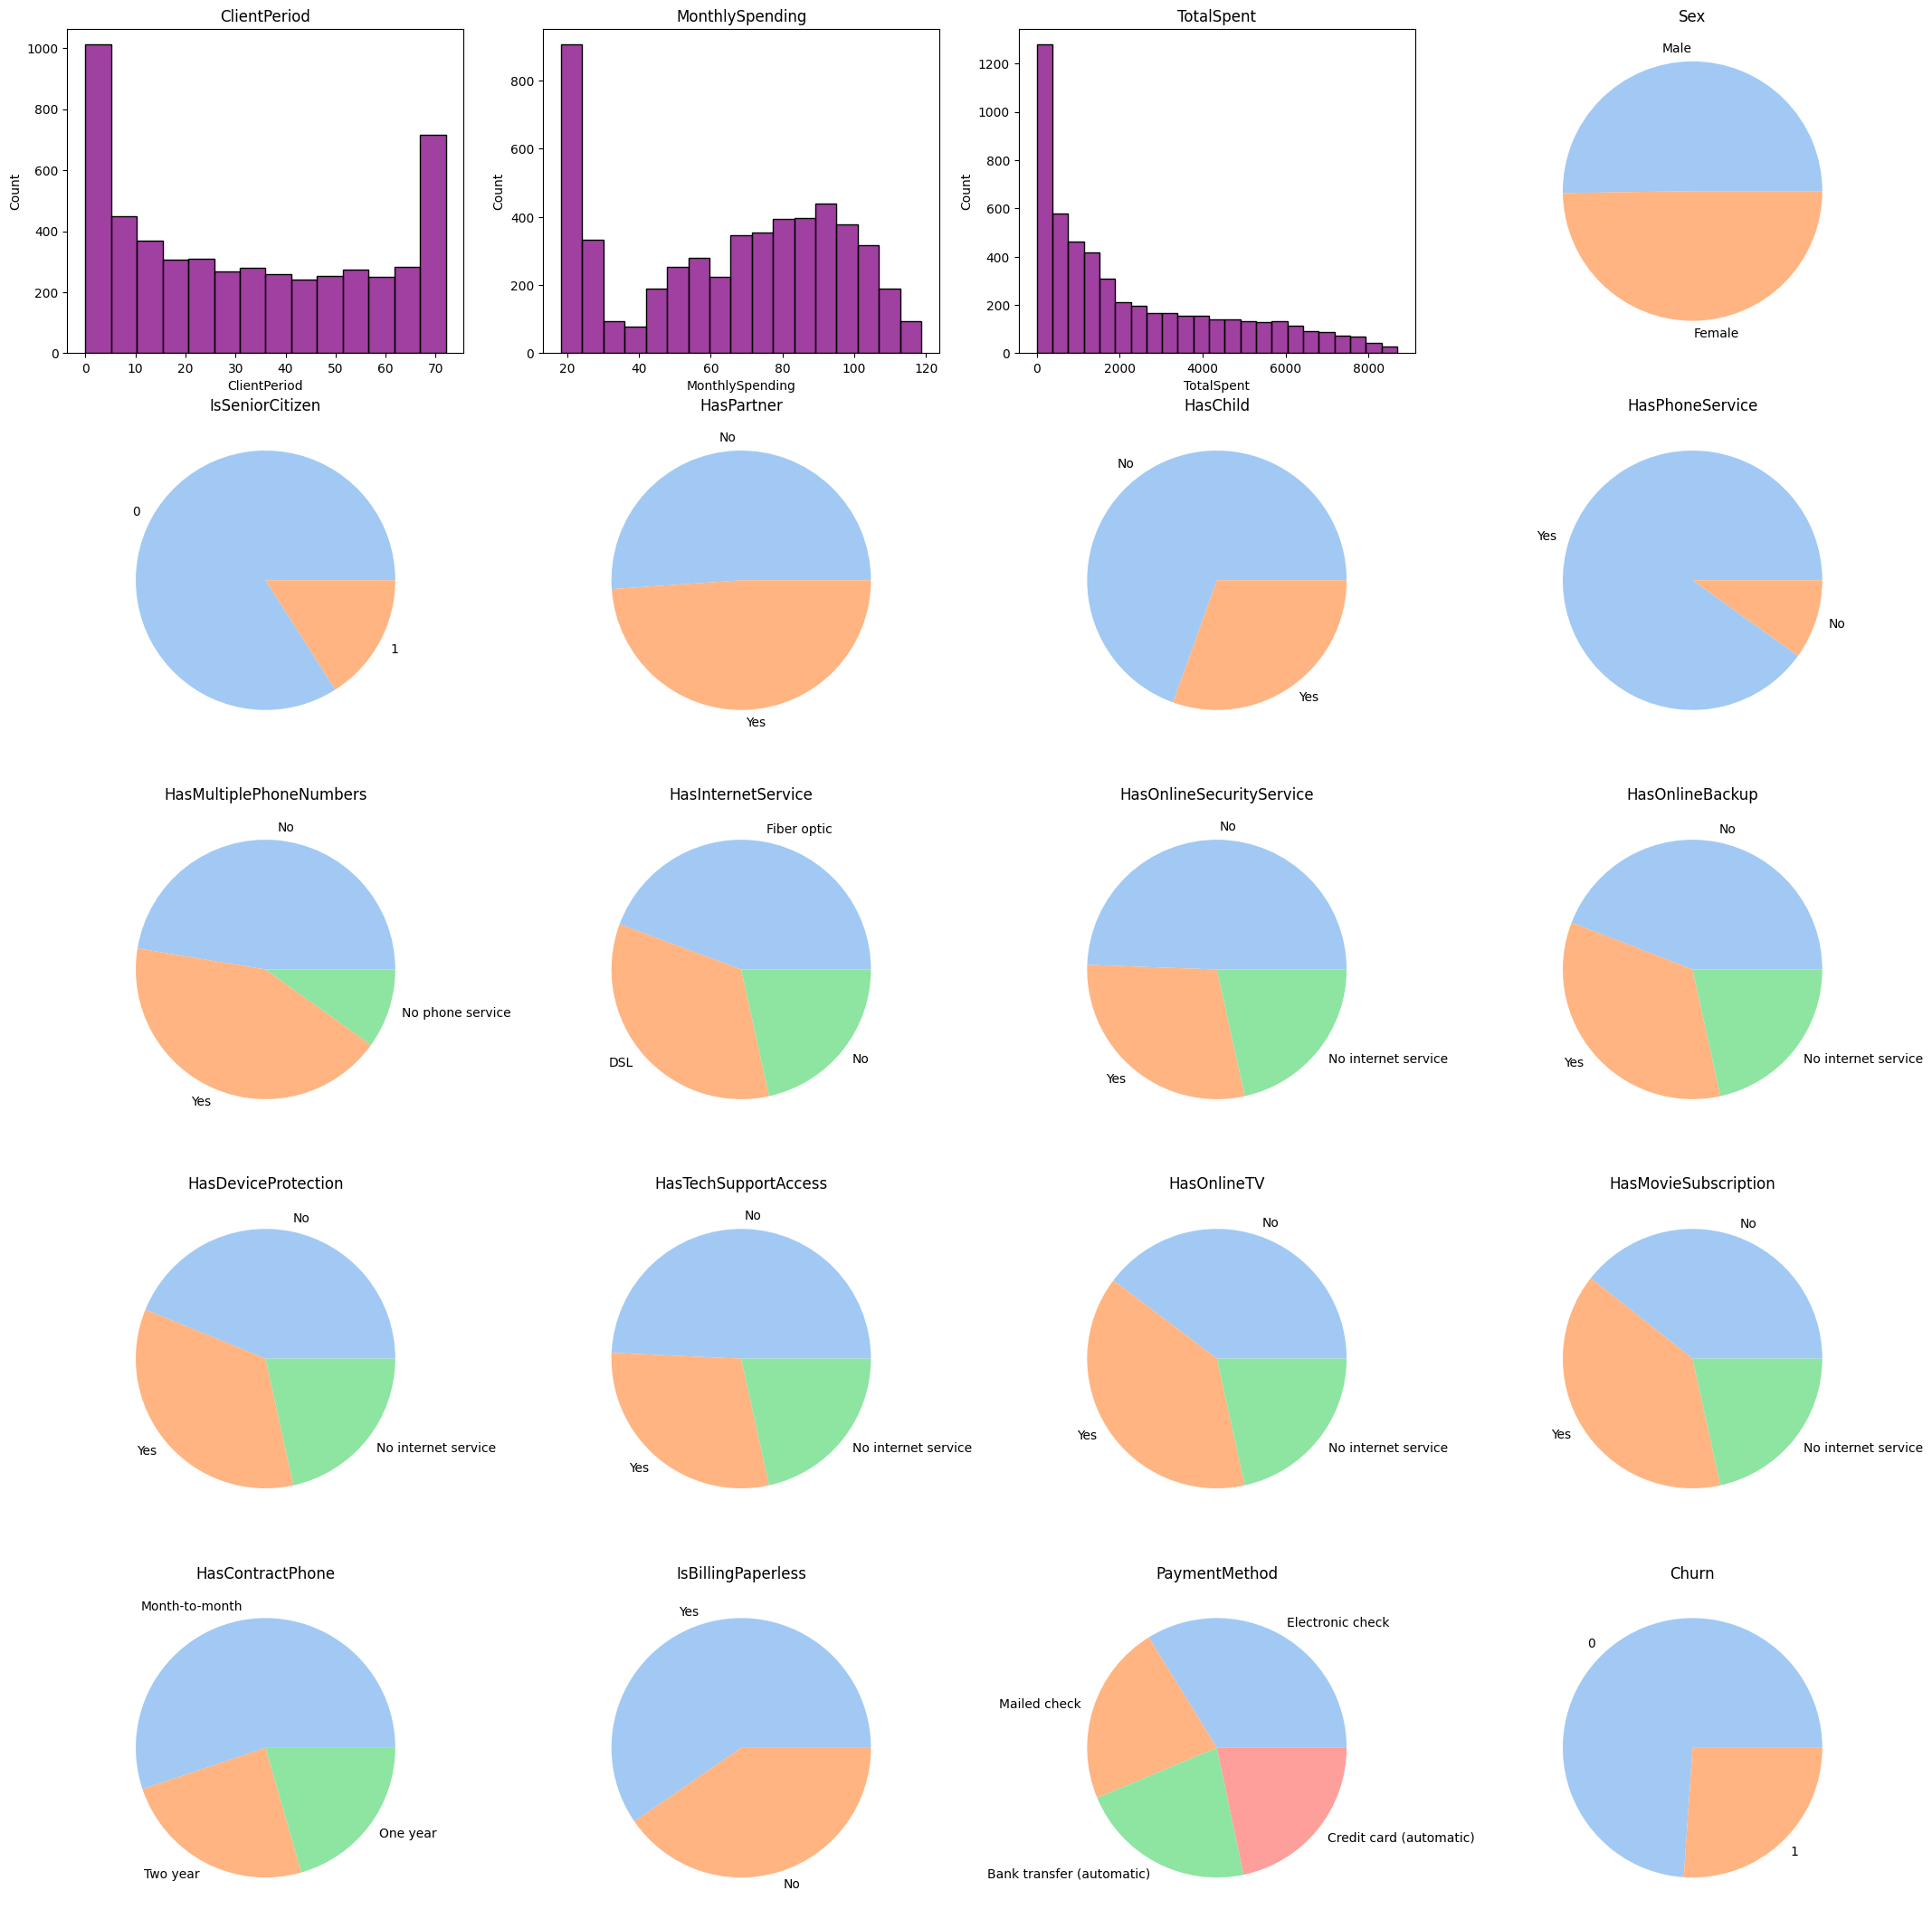

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

fig, axs = plt.subplots(nrows=train_data.columns.size//4, ncols=4, figsize=(26,27))

column_number = 0

for row_ax in axs:
    for ax in row_ax:
        if isinstance(train_data[train_data.columns[column_number]].dtype, CategoricalDtype):
            value_counts = train_data[train_data.columns[column_number]].value_counts()
            ax.pie(value_counts.values, labels=value_counts.keys().tolist(), colors=sns.color_palette("pastel"))
            ax.set_title(train_data.columns[column_number])
        else:
            sns.histplot(data=train_data, x=train_data.columns[column_number], ax=ax, color="purple")
            ax.set_title(train_data.columns[column_number])
        column_number += 1 

In [105]:
train_data['Churn'].value_counts()

Churn
0    3894
1    1374
Name: count, dtype: int64

Видно, что таргет не сбалансирован, хоть и не очень сильно

## Применим логистическую регрессию

In [106]:
# Разделим для удобства тренировочную выборку на признаки и таргет
X_train, Y_train = train_data.drop('Churn', axis=1), train_data.Churn

In [107]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
import numpy as np


# Пайплайн для категориальных признаков
cat_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="Null"), OneHotEncoder(drop="first"))

# Пайплайн для численных признаков
num_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value=np.nan), StandardScaler())

# Объединение двух пайплайнов с проверкой на тип
preprocessing = make_column_transformer(
    (num_pipe, make_column_selector(dtype_include=np.number)),
    (cat_pipe, make_column_selector(dtype_include=pd.CategoricalDtype())))

#Добавление логистической регрессии в пайплайн
logistic_regression_pipe = Pipeline(steps=[("pipeline", preprocessing), ("logistic_regression", LogisticRegression())])

param_grid = {'logistic_regression__C': [100, 10, 1, 0.1, 0.01, 0.001],
              'logistic_regression__penalty': ['l1', 'l2'],
              'logistic_regression__solver': ['liblinear'],
              'logistic_regression__max_iter': [100, 200, 300]}

# GridSearch с кросс валидацией
logistic_regression_cv = GridSearchCV(logistic_regression_pipe, 
                                   param_grid, cv=7, 
                                   scoring='roc_auc',
                                   error_score='raise')

logistic_regression_cv.fit(X_train, Y_train)

print(logistic_regression_cv.best_params_)
print(logistic_regression_cv.best_score_)

{'logistic_regression__C': 10, 'logistic_regression__max_iter': 100, 'logistic_regression__penalty': 'l2', 'logistic_regression__solver': 'liblinear'}
0.8448456224874378


## Попробуем Catboost

In [113]:
from catboost import CatBoostClassifier

params = {'depth': [3, 4, 5],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'logging_level':['Silent'],
          'num_trees':[100, 500, 1000],
          'learning_rate':[0.02, 0.03, 0.05],
          'task_type' : ['GPU'],
          'cat_features' : [cat_cols]
         }

catboost_grid = GridSearchCV(estimator=CatBoostClassifier(), param_grid=params, scoring='roc_auc', cv=7)

catboost_grid.fit(X_train, Y_train)

print(catboost_grid.best_params_)
print(catboost_grid.best_score_)

{'cat_features': ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'], 'depth': 4, 'learning_rate': 0.02, 'logging_level': 'Silent', 'loss_function': 'Logloss', 'num_trees': 500, 'task_type': 'GPU'}
0.8465051285301002


## Обработаем тестовую выборку

In [114]:
test_data = pd.read_csv("./advanced-dls-spring-2021/test.csv")

changed_types = []

for col in num_cols:
    if is_object_dtype(test_data[col]):
        test_data[col] = pd.to_numeric(test_data[col], errors='coerce')
        changed_types.append(col)
        print(col + " type changed to numeric")
        
        
for col in cat_cols:
    if is_numeric_dtype(test_data[col]):
        changed_types.append(col)
        print(col + " type changed to category")
    test_data[col] = test_data[col].astype('category')
    
    
train_data['TotalSpent'] = train_data['TotalSpent'].fillna(0)
train_data.info()

TotalSpent type changed to numeric
IsSeniorCitizen type changed to category
<class 'pandas.core.frame.DataFrame'>
Index: 5268 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ClientPeriod              5268 non-null   int64   
 1   MonthlySpending           5268 non-null   float64 
 2   TotalSpent                5268 non-null   float64 
 3   Sex                       5268 non-null   category
 4   IsSeniorCitizen           5268 non-null   category
 5   HasPartner                5268 non-null   category
 6   HasChild                  5268 non-null   category
 7   HasPhoneService           5268 non-null   category
 8   HasMultiplePhoneNumbers   5268 non-null   category
 9   HasInternetService        5268 non-null   category
 10  HasOnlineSecurityService  5268 non-null   category
 11  HasOnlineBackup           5268 non-null   category
 12  HasDeviceProtection       5268 no

## Catboost показал более высокий score, поэтому используем его с лучшими параматрами, которые дал GridSearchCV

In [119]:
catboost_model = CatBoostClassifier(
    cat_features=cat_cols,
    depth=4,
    learning_rate=0.02,
    logging_level='Silent',
    loss_function='Logloss',
    num_trees=500,
    task_type='GPU'
)
catboost_model.fit(X_train, Y_train)

test_pred = catboost_model.predict_proba(test_data)

my_submission = pd.read_csv("./advanced-dls-spring-2021/submission.csv")


my_submission['Churn'] = test_pred[:, 1]

my_submission.to_csv("./my_submission.csv", index=False)